## Author-Rohan Rathi

## Customer churn prediction

Customer churn prediction is a process used by businesses to identify and predict when their customers are likely to stop using their products or services. Churn, also known as customer attrition, can have a significant impact on a company's revenue and profitability, making it essential to identify and address it effectively.

Churn prediction is a dynamic and ongoing process, and businesses should be proactive in their efforts to retain customers. It's important to balance prediction accuracy with practicality and ethical considerations to ensure a positive customer experience while minimizing churn.

Dataset-https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction 

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read The Dataset

In [4]:
churn=pd.read_csv('Churn_Modelling.csv')

## Data Cleaning And Preprocessing

In [5]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
churn.shape

(10000, 14)

In [7]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
churn.duplicated().sum()

0

Also, no duplicate values are present in the dataset.

## Data Visualization

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Exited', ylabel='count'>

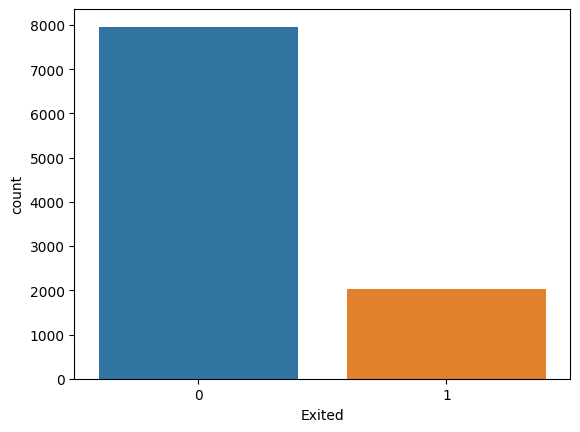

In [13]:
sns.countplot(data=churn,x='Exited')

In [14]:
churn['Exited'].value_counts().to_frame()

,count
Exited,
0,7963
1,2037


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: xlabel='Gender', ylabel='count'>

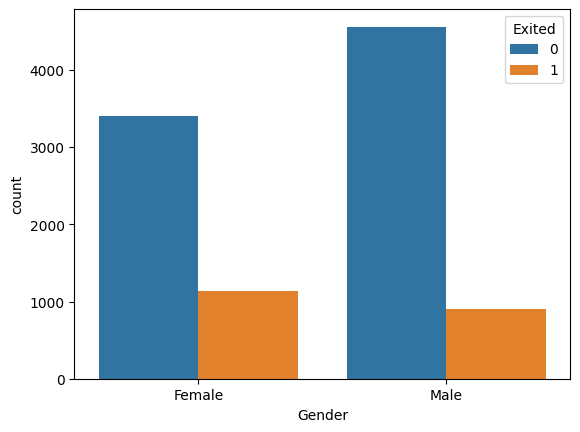

In [15]:
sns.countplot(x='Gender',hue='Exited',data=churn)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: xlabel='Geography', ylabel='count'>

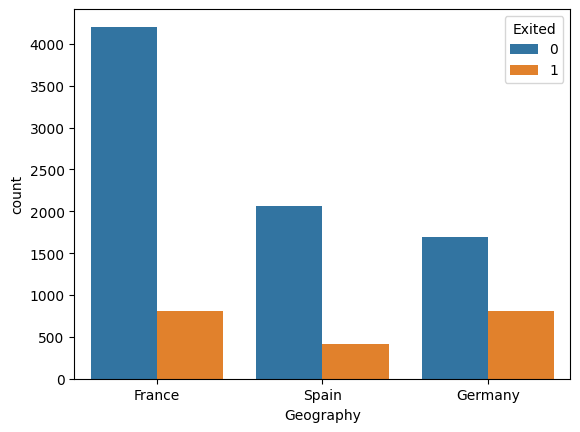

In [16]:
sns.countplot(x='Geography',hue='Exited',data=churn)

In [20]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [23]:
churn.drop(['RowNumber', 'CustomerId', 'Surname','Geography','Gender'],axis=1,inplace=True)

In [24]:
churn.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<Axes: >

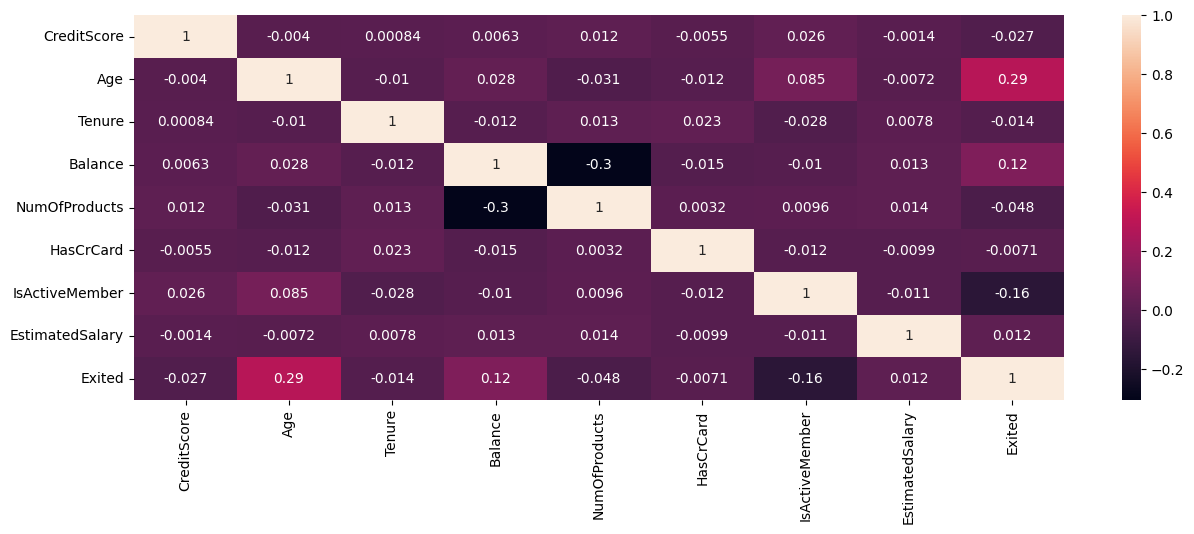

In [27]:
plt.figure(figsize=(15,5))
sns.heatmap(churn.corr(),annot=True)

## Data Preprocessing

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
for column in churn.columns:
    if churn[column].dtype==np.number:
        continue
    churn[column]=le.fit_transform(churn[column])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5364\1351189732.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if churn[column].dtype==np.number:
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5364\1351189732.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if churn[column].dtype==np.number:
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5364\1351189732.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if churn[column].dtype==np.number:
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5364\1351189732.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if churn[column].dt

In [36]:
churn

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228,24,2,0.00,0,1,1,101348.88,1
1,217,23,1,83807.86,0,0,1,112542.58,0
2,111,24,8,159660.80,2,1,0,113931.57,1
3,308,21,1,0.00,1,0,0,93826.63,0
4,459,25,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,380,21,5,0.00,1,1,0,96270.64,0
9996,125,17,10,57369.61,0,1,1,101699.77,0
9997,318,18,7,0.00,0,0,1,42085.58,1
9998,381,24,3,75075.31,1,1,0,92888.52,1


In [37]:
x=churn.drop('Exited',axis=1)

In [38]:
y=churn.Exited

In [39]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Scaling the Dataset

In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

The 'StandardScaler' is a preprocessing technique commonly used in machine learning to standardize or normalize the features of your dataset. Standardization ensures that features have a mean of 0 and a standard deviation of 1, which can be particularly important for certain machine learning algorithms and to make your data more interpretable.

In [40]:
x_feature=ss.fit_transform(x)

In [41]:
x_feature

array([[-0.32733113,  0.29379269, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44133106,  0.19838686, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53987591,  0.29379269,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60539563, -0.27864224,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25830436,  0.29379269, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46557697, -1.04188881, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

After splitting your data using 'train_test_split', you can use 'X_train' and 'y_train' for training your machine learning model and 'X_test' and 'y_test' for evaluating the model's performance.

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x_feature,y,test_size=0.2,random_state=1)

In [43]:
xtrain.shape

(8000, 8)

In [44]:
ytrain.shape

(8000,)

In [45]:
xtest.shape

(2000, 8)

In [46]:
ytest.shape

(2000,)

## Model Selection

In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

Logistic regression is a popular algorithm used for binary classification tasks, where the goal is to predict one of two possible classes (0 or 1).

In [48]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [49]:
predict=lr.predict(xtest)

In [50]:
lr.score(xtest,ytest)

0.8065

## Performance Matrix

In [51]:
from sklearn.metrics import accuracy_score
#accuracy score
accuracy_score(ytest,predict)

0.8065

The code provided uses scikit-learn's 'accuracy_score' function to calculate the accuracy of a classification model's predictions. 

## Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix

A confusion matrix is a useful tool for evaluating the performance of a classification model. 

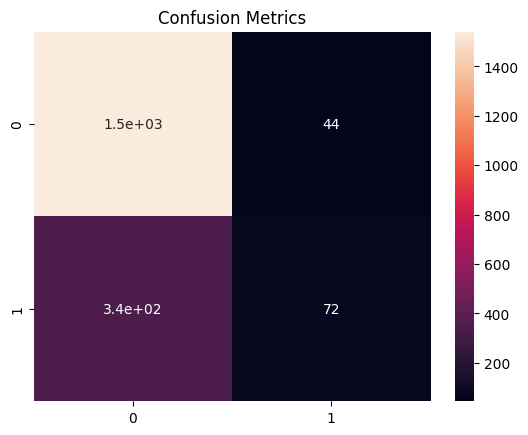

In [55]:
Cm=confusion_matrix(ytest,predict)
ax=plt.axes()
sns.heatmap(Cm, annot=True,
           annot_kws={'size':10},
           #xticklabels=labels,
           #yticklabels=labels,
            ax=ax
           )

plt.title("Confusion Metrics")
plt.show()

This heatmap provides a visual representation of the confusion matrix, making it easier to interpret the model's performance in terms of true positives, true negatives, false positives, and false negatives.

In [54]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1585
           1       0.62      0.17      0.27       415

    accuracy                           0.81      2000
   macro avg       0.72      0.57      0.58      2000
weighted avg       0.78      0.81      0.76      2000



## !! Thankyou